#**MOVIE RECOMMENDER SYSTEM**

##**DATASET UPLOADING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#we have used tmdb dataset
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **DATA PREPROCESSING**

In [5]:
movies = movies.merge(credits,on='title')

In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies=movies[['movie_id','title','genres','overview','keywords','cast','crew']]
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movies.isnull().sum()

,0
movie_id,0
title,0
genres,0
overview,3
keywords,0
cast,0
crew,0


In [9]:
movies.dropna(inplace=True)
movies.isnull().sum()

,0
movie_id,0
title,0
genres,0
overview,0
keywords,0
cast,0
crew,0


In [10]:
movies.duplicated().sum()

0

In [11]:
m=movies.iloc[0].genres
#it is list of dictionaries so convert into [action, adventure, fantasy, scifi]

In [12]:
#to convert string into list
import ast
#m=ast.literal_eval(m)

In [13]:

def convert(obj):
  c=[]
  for i in ast.literal_eval(obj):
    c.append(i['name'])
  return c

In [14]:
movies['genres']=movies['genres'].apply(convert)


In [15]:
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
movies['keywords']=movies['keywords'].apply(convert)

In [17]:
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
movies['cast'][0]
#extract 4 names of cast from cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [19]:
def convertcast(obj):
  c=[]
  counter=0
  for i in ast.literal_eval(obj):
    if counter !=4:
      c.append(i['name'])
      counter+=1
    else:
      break
  return c

In [20]:
movies['cast']=movies['cast'].apply(convertcast)

In [21]:
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
movies['crew'][0]
#extract director and name from crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [23]:
def extract(obj):
  c=[]
  for i in ast.literal_eval(obj):
    if i['job']=='Director':
      c.append(i['name'])
      break
  return c

In [24]:
movies['crew']=movies['crew'].apply(extract)

In [25]:
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [26]:
movies['overview'][0]
#it is a string convert into list

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [27]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [28]:
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[John, Carter, is, a, war-weary,, former, mili...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [29]:
#concatenate lists, and then merge those list into string which will output in tags

In [30]:
#remove spaces between names and words b/c every word will become different tag however johnny depp is one word but sue to space it will divide into 2 other tags which will create confusion for model
#for eg science fiction is one word but it will divide science into 1 tag and fiction in other

In [31]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])

In [32]:
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])

In [33]:
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])

In [34]:
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [35]:
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [36]:
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [37]:
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


##**EDA**

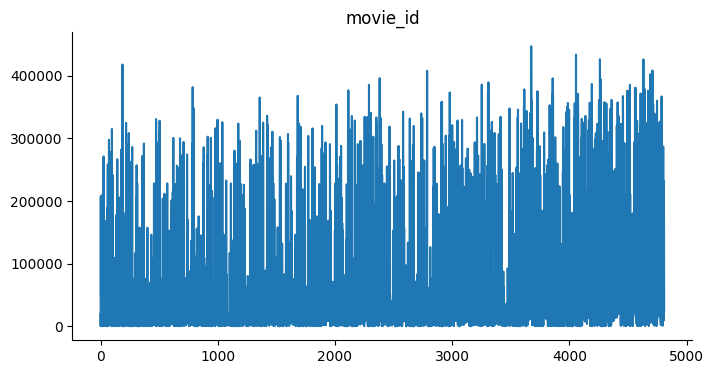

In [38]:
# @title movie_id

from matplotlib import pyplot as plt
movies['movie_id'].plot(kind='line', figsize=(8, 4), title='movie_id')
plt.gca().spines[['top', 'right']].set_visible(False)

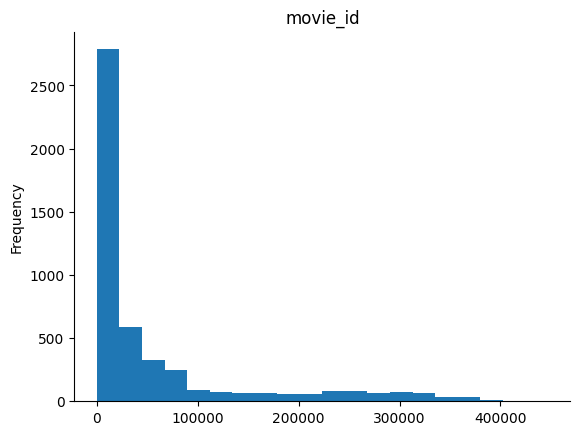

In [39]:
# @title movie_id

from matplotlib import pyplot as plt
movies['movie_id'].plot(kind='hist', bins=20, title='movie_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
#no need of other columns so remove other columns and only tags is needed

In [41]:
newdf = movies[['movie_id','title','tags']]
newdf

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [42]:
newdf['tags']=newdf['tags'].apply(lambda x:" ".join(x))

<ipython-input-42-91d0d2e66600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['tags']=newdf['tags'].apply(lambda x:" ".join(x))


In [43]:
newdf

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [44]:
newdf['tags']=newdf['tags'].apply(lambda x:x.lower())

<ipython-input-44-e5969e6cb950>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['tags']=newdf['tags'].apply(lambda x:x.lower())


In [45]:
newdf.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


#**VECTORIZATION**

In [46]:
newdf['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang jamescameron'

In [47]:
newdf['tags'][1]

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley stellanskarsgård goreverbinski"

In [48]:
#convert text into vectors and calculate similarity between tags
#check closest vectors for recommendation
#bag of words -> technique to convert text into vectors
#countvectorizer to remove stop words

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [50]:
vector = cv.fit_transform(newdf['tags']).toarray()

In [51]:
vector.shape

(4806, 5000)

In [52]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
print(cv.get_feature_names_out())

['000' '007' '10' ... 'zone' 'zoo' 'zooeydeschanel']


In [54]:
len(cv.get_feature_names_out())

5000

In [55]:
#apply stemming to your text
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [56]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [57]:
#example:
stem('learning is better')

'learn is better'

In [58]:
stem(newdf['tags'][0])

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang jamescameron'

In [59]:
newdf['tags']=newdf['tags'].apply(stem)

<ipython-input-59-2738cd662001>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['tags']=newdf['tags'].apply(stem)


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [61]:
vector = cv.fit_transform(newdf['tags']).toarray()

In [62]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [64]:
#calculate cosine distance since euclidean is not good for higher dimension
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(vector)

In [65]:
sim.shape

(4806, 4806)

In [66]:
ls = list(enumerate(sim[0])) #similarity of first movie with all movies

In [67]:
sorted(ls,reverse=True,key=lambda x:x[1])[1:6]

[(1214, 0.28676966733820225),
 (2405, 0.26310068027921696),
 (507, 0.255608593705383),
 (3728, 0.25391668753850405),
 (539, 0.2467838236981868)]

##**CONTENT BASED SAMPLE CODE**

In [88]:
def recommend_content2(movie):
  movie_index = newdf[newdf['title']==movie].index[0]
  distance = sim[movie_index]
  m_list = sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:6]

  for i in m_list:
    print(newdf.iloc[i[0]].title)

In [89]:
recommend_content2('Avatar')

Aliens vs Predator: Requiem
Aliens
Independence Day
Falcon Rising
Titan A.E.


In [90]:
recommend_content2('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


##**content based function using n recommendation**

In [91]:
def recommend_content(movie, sim, newdf, n_recommendations=10):
    movie_index = newdf[newdf['title'] == movie].index[0]
    distance = sim[movie_index]
    m_list = sorted(list(enumerate(distance)), reverse=True, key=lambda x: x[1])[1: n_recommendations]

    recommended_movies = []
    for i in m_list:
        recommended_movies.append(newdf.iloc[i[0]].title)

    print(f"Recommended movies for '{movie}':")
    for movie in recommended_movies:
        print(movie)
    return recommended_movies


In [92]:
recommend_content("Avatar", sim, newdf)

Recommended movies for 'Avatar':
Aliens vs Predator: Requiem
Aliens
Independence Day
Falcon Rising
Titan A.E.
Battle: Los Angeles
Predators
Small Soldiers
Jupiter Ascending


['Aliens vs Predator: Requiem',
 'Aliens',
 'Independence Day',
 'Falcon Rising',
 'Titan A.E.',
 'Battle: Los Angeles',
 'Predators',
 'Small Soldiers',
 'Jupiter Ascending']

##**COLLABOATIVE FILTERING**:

In [71]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 68.0 MB/s eta 0:00:00


In [72]:
m=pd.read_csv('/content/tmdb_5000_movies.csv')
m

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

##**POPULAR MOVIES**

In [73]:
most_popular_movies = m.sort_values(by='popularity', ascending=False)
top_n = 10
top_popular_movies = most_popular_movies[['title', 'popularity', 'vote_count', 'vote_average']].head(top_n)
print("Top Popular Movies:")
print(top_popular_movies)


Top Popular Movies:
                                                 title  popularity  \
546                                            Minions  875.581305   
95                                        Interstellar  724.247784   
788                                           Deadpool  514.569956   
94                             Guardians of the Galaxy  481.098624   
127                                 Mad Max: Fury Road  434.278564   
28                                      Jurassic World  418.708552   
199  Pirates of the Caribbean: The Curse of the Bla...  271.972889   
82                      Dawn of the Planet of the Apes  243.791743   
200              The Hunger Games: Mockingjay - Part 1  206.227151   
88                                          Big Hero 6  203.734590   

     vote_count  vote_average  
546        4571           6.4  
95        10867           8.1  
788       10995           7.4  
94         9742           7.9  
127        9427           7.2  
28         8662  

In [74]:
m=m[['id','title','genres','vote_count', 'popularity','vote_average']]
m.head()

,id,title,genres,vote_count,popularity,vote_average
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",11800,150.437577,7.2
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",4500,139.082615,6.9
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",4466,107.376788,6.3
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9106,112.312950,7.6
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2124,43.926995,6.1


In [75]:
m.isnull().sum()

,0
id,0
title,0
genres,0
vote_count,0
popularity,0
vote_average,0


In [76]:
m.duplicated().sum()

0

In [77]:
#to convert string into list
import ast
#m=ast.literal_eval(m)

In [78]:
def convert(obj):
  c=[]
  for i in ast.literal_eval(obj):
    c.append(i['name'])
  return c

In [79]:
m['genres']=m['genres'].apply(convert)


<ipython-input-79-b57b477eb289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['genres']=m['genres'].apply(convert)


In [80]:
m

,id,title,genres,vote_count,popularity,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",11800,150.437577,7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",4500,139.082615,6.9
2,206647,Spectre,"[Action, Adventure, Crime]",4466,107.376788,6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",9106,112.312950,7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]",2124,43.926995,6.1
...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Action, Crime, Thriller]",238,14.269792,6.6
4799,72766,Newlyweds,"[Comedy, Romance]",5,0.642552,5.9
4800,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]",6,1.444476,7.0
4801,126186,Shanghai Calling,[],7,0.857008,5.7


In [81]:
m.describe()

,id,vote_count,popularity,vote_average
count,4803.000000,4803.000000,4803.000000,4803.000000
mean,57165.484281,690.217989,21.492301,6.092172
std,88694.614033,1234.585891,31.816650,1.194612
min,5.000000,0.000000,0.000000,0.000000
25%,9014.500000,54.000000,4.668070,5.600000
50%,14629.000000,235.000000,12.921594,6.200000
75%,58610.500000,737.000000,28.313505,6.800000
max,459488.000000,13752.000000,875.581305,10.000000


##**WEIGHTED SCORE**

In [82]:
vote_count_weight = 1.0
popularity_weight = 0.5
m['weighted_score'] = (m['vote_average'] * m['vote_count'] * vote_count_weight) + (m['popularity'] * popularity_weight)
sorted_movies = m.sort_values(by='weighted_score', ascending=False)
print(sorted_movies[['title', 'weighted_score']].head(10))

                       title  weighted_score
96                 Inception   111474.991855
65           The Dark Knight    98510.061463
95              Interstellar    88384.823892
16              The Avengers    87214.624317
0                     Avatar    85035.218789
788                 Deadpool    81620.284978
287         Django Unchained    78813.260846
662               Fight Club    78201.278696
94   Guardians of the Galaxy    77202.349312
634               The Matrix    70417.454997


<ipython-input-82-f6483882d78a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['weighted_score'] = (m['vote_average'] * m['vote_count'] * vote_count_weight) + (m['popularity'] * popularity_weight)


In [83]:
m

,id,title,genres,vote_count,popularity,vote_average,weighted_score
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",11800,150.437577,7.2,85035.218789
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",4500,139.082615,6.9,31119.541307
2,206647,Spectre,"[Action, Adventure, Crime]",4466,107.376788,6.3,28189.488394
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",9106,112.312950,7.6,69261.756475
4,49529,John Carter,"[Action, Adventure, Science Fiction]",2124,43.926995,6.1,12978.363498
...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Action, Crime, Thriller]",238,14.269792,6.6,1577.934896
4799,72766,Newlyweds,"[Comedy, Romance]",5,0.642552,5.9,29.821276
4800,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]",6,1.444476,7.0,42.722238
4801,126186,Shanghai Calling,[],7,0.857008,5.7,40.328504


In [85]:
import numpy as np
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(m['id'].unique())}
rows = [movie_id_to_index[movie_id] for movie_id in m['id']]
cols = rows
values = m['weighted_score']

user_item_matrix = csr_matrix((values, (rows, cols)), shape=(len(movie_id_to_index),len(movie_id_to_index)))
#model
model = AlternatingLeastSquares(factors=100, regularization=0.05, iterations=30)
model.fit(user_item_matrix.T)


/usr/local/lib/python3.10/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.0015773773193359375 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

In [86]:
print(user_item_matrix)
print(f"Shape: {user_item_matrix.shape}, Non-zero values: {user_item_matrix.nnz}")


  (0, 0)	85035.2187885
  (1, 1)	31119.5413075
  (2, 2)	28189.488394
  (3, 3)	69261.75647499999
  (4, 4)	12978.3634975
  (5, 5)	21156.249907
  (6, 6)	24666.3409845
  (7, 7)	49466.2396145
  (8, 8)	39217.642818500004
  (9, 9)	40000.695226
  (10, 10)	7588.9628115000005
  (11, 11)	18140.4644055
  (12, 12)	36794.9236895
  (13, 13)	13659.423478
  (14, 14)	41383.1990045
  (15, 15)	10295.989301
  (16, 16)	87214.6243165
  (17, 17)	31734.906928
  (18, 18)	25818.0175895
  (19, 19)	33856.4828715
  (20, 20)	42853.933138
  (21, 21)	8686.434150500001
  (22, 22)	34429.585282
  (23, 23)	7578.895453
  (24, 24)	15454.813004999998
  :	:
  (4778, 4778)	789.5505985
  (4779, 4779)	494.460311
  (4780, 4780)	0.0190715
  (4781, 4781)	6.024474
  (4782, 4782)	129.72426199999998
  (4783, 4783)	373.1095835
  (4784, 4784)	93.6219775
  (4785, 4785)	0.163897
  (4786, 4786)	67.53728499999998
  (4787, 4787)	56.3729955
  (4788, 4788)	684.276822
  (4789, 4789)	114.632283
  (4790, 4790)	112.79688949999999
  (4791, 4791)	2.1

##**collaborative filtering**

In [93]:
def get_movie_id_by_name(movie_name, movies_df):
    movie_row = movies_df[movies_df['title'].str.contains(movie_name, case=False, na=False)]

    if not movie_row.empty:
        movie_id = movie_row.iloc[0]['id']
        return movie_id
    else:
        return None


In [94]:
def recommend_collaborative(movie, n_recommendations=10):
    movie_id = get_movie_id_by_name(movie, m)
    if movie_id is None:
        return f"Movie '{movie}' not found in the dataset."

    #internal index of the movie
    movie_index = m[m['id'] == movie_id].index[0]
    print(f"Movie ID: {movie_id}, Movie Index: {movie_index}, Title: {m.iloc[movie_index]['title']}")

    recommendations = model.similar_items(movie_index, N=n_recommendations + 1)
    recommended_movies = []
    for i in range(1, len(recommendations[0])):  # Skip the first recommendation
        als_movie_index = recommendations[0][i]  # Extract the movie index from the recommendations
        als_movie_index = int(als_movie_index)

        if 0 <= als_movie_index < len(m):
            print(f"Recommendation Index: {als_movie_index}, Title: {m.iloc[als_movie_index]['title']}")
            movie_title = m.iloc[als_movie_index]['title']
            recommended_movies.append(movie_title)
        else:
            print(f"Invalid Index: {als_movie_index}")
    return recommended_movies



In [95]:
# Example usage
movie = 'Batman'
recommended_movies = recommend_collaborative(movie)
print("Recommended Movies:", recommended_movies)

Movie ID: 209112, Movie Index: 9, Title: Batman v Superman: Dawn of Justice
Recommendation Index: 2910, Title: A Tale of Three Cities
Recommendation Index: 3285, Title: Restless
Recommendation Index: 3886, Title: It's a Wonderful Life
Recommendation Index: 2914, Title: Doctor Zhivago
Recommendation Index: 161, Title: Gods of Egypt
Recommendation Index: 110, Title: Pearl Harbor
Recommendation Index: 3086, Title: Gun Shy
Recommendation Index: 1371, Title: Trainwreck
Recommendation Index: 4386, Title: Antarctica: A Year on Ice
Recommendation Index: 395, Title: The Holiday
Recommended Movies: ['A Tale of Three Cities', 'Restless', "It's a Wonderful Life", 'Doctor Zhivago', 'Gods of Egypt', 'Pearl Harbor', 'Gun Shy', 'Trainwreck', 'Antarctica: A Year on Ice', 'The Holiday']


In [96]:
movie = 'Avatar'
recommended_movies = recommend_collaborative(movie)
print("Recommended Movies:", recommended_movies)

Movie ID: 19995, Movie Index: 0, Title: Avatar
Recommendation Index: 2903, Title: 10 Days in a Madhouse
Recommendation Index: 447, Title: Eagle Eye
Recommendation Index: 65, Title: The Dark Knight
Recommendation Index: 726, Title: Starsky & Hutch
Recommendation Index: 4285, Title: Filly Brown
Recommendation Index: 4624, Title: Locker 13
Recommendation Index: 1051, Title: Prisoners
Recommendation Index: 1321, Title: Texas Rangers
Recommendation Index: 2814, Title: Barbershop
Recommendation Index: 113, Title: Harry Potter and the Order of the Phoenix
Recommended Movies: ['10 Days in a Madhouse', 'Eagle Eye', 'The Dark Knight', 'Starsky & Hutch', 'Filly Brown', 'Locker 13', 'Prisoners', 'Texas Rangers', 'Barbershop', 'Harry Potter and the Order of the Phoenix']


##**Filtering on Genre**

In [98]:
def filtered(movie):
  input_movie_genres = set(m[m['title'] == movie]['genres'].iloc[0])
  recommended_movies = recommend_collaborative(movie)
  filtered_recommendations = []
  for movie in recommended_movies:
      movie_genres = set(m[m['title'] == movie]['genres'].iloc[0])
      if input_movie_genres & movie_genres:
          filtered_recommendations.append(movie)

  return filtered_recommendations


In [100]:
filter=filtered("Avatar")
print("FILTERED RECOMMENDATIONS ARE: ",filter)

Movie ID: 19995, Movie Index: 0, Title: Avatar
Recommendation Index: 2903, Title: 10 Days in a Madhouse
Recommendation Index: 447, Title: Eagle Eye
Recommendation Index: 65, Title: The Dark Knight
Recommendation Index: 726, Title: Starsky & Hutch
Recommendation Index: 4285, Title: Filly Brown
Recommendation Index: 4624, Title: Locker 13
Recommendation Index: 1051, Title: Prisoners
Recommendation Index: 1321, Title: Texas Rangers
Recommendation Index: 2814, Title: Barbershop
Recommendation Index: 113, Title: Harry Potter and the Order of the Phoenix
FILTERED RECOMMENDATIONS ARE:  ['Eagle Eye', 'The Dark Knight', 'Texas Rangers', 'Harry Potter and the Order of the Phoenix']


##**HYBRID MODEL(content and collaborative)**

In [103]:
def hybrid_recommendation(movie, n_recommendations=10, collaborative_weight=0.4, content_weight=0.6):
    print("collaborative:")
    collaborative_recs = filtered(movie)
    print("content:")
    content_recs = recommend_content(movie, sim, newdf)

    num_collab_recs = int(collaborative_weight * n_recommendations)
    num_content_recs = int(content_weight * n_recommendations)

    all_recommendations = list(set(collaborative_recs[:num_collab_recs] + content_recs[:num_content_recs]))

    return all_recommendations[:n_recommendations]


In [104]:
movie = "Avatar"
recommended_movies = hybrid_recommendation(movie)
print("Hybrid Recommended Movies:", recommended_movies)

collaborative:
Movie ID: 19995, Movie Index: 0, Title: Avatar
Recommendation Index: 2903, Title: 10 Days in a Madhouse
Recommendation Index: 447, Title: Eagle Eye
Recommendation Index: 65, Title: The Dark Knight
Recommendation Index: 726, Title: Starsky & Hutch
Recommendation Index: 4285, Title: Filly Brown
Recommendation Index: 4624, Title: Locker 13
Recommendation Index: 1051, Title: Prisoners
Recommendation Index: 1321, Title: Texas Rangers
Recommendation Index: 2814, Title: Barbershop
Recommendation Index: 113, Title: Harry Potter and the Order of the Phoenix
content:
Recommended movies for 'Avatar':
Aliens vs Predator: Requiem
Aliens
Independence Day
Falcon Rising
Titan A.E.
Battle: Los Angeles
Predators
Small Soldiers
Jupiter Ascending
Hybrid Recommended Movies: ['Independence Day', 'Texas Rangers', 'Titan A.E.', 'Aliens', 'Harry Potter and the Order of the Phoenix', 'Falcon Rising', 'The Dark Knight', 'Battle: Los Angeles', 'Aliens vs Predator: Requiem', 'Eagle Eye']


##**ACCURACY**

In [105]:
newdf.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [109]:
movie='Avatar'
relevant_movies_collaborative = filtered(movie)

print(f"Relevant Movies for Avatar (Collaborative Filtering): {relevant_movies_collaborative}")


Movie ID: 19995, Movie Index: 0, Title: Avatar
Recommendation Index: 2903, Title: 10 Days in a Madhouse
Recommendation Index: 447, Title: Eagle Eye
Recommendation Index: 65, Title: The Dark Knight
Recommendation Index: 726, Title: Starsky & Hutch
Recommendation Index: 4285, Title: Filly Brown
Recommendation Index: 4624, Title: Locker 13
Recommendation Index: 1051, Title: Prisoners
Recommendation Index: 1321, Title: Texas Rangers
Recommendation Index: 2814, Title: Barbershop
Recommendation Index: 113, Title: Harry Potter and the Order of the Phoenix
Relevant Movies for Avatar (Collaborative Filtering): ['Eagle Eye', 'The Dark Knight', 'Texas Rangers', 'Harry Potter and the Order of the Phoenix']


In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score
relevant_movies = relevant_movies_collaborative
recommended_movies

y_true = [1 if movie in relevant_movies else 0 for movie in recommended_movies]  # Ground truth
y_pred = [1 if movie in relevant_movies else 0 for movie in recommended_movies]  # Predicted by model

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score

relevant_movies = set(['Titan A.E.', 'Independence Day', 'Aliens vs Predator: Requiem', 'Predators', 'Jupiter Ascending'])
recommended_movies

y_true = [1 if movie in relevant_movies else 0 for movie in recommended_movies]  # Ground truth
y_pred = [1 if movie in relevant_movies else 0 for movie in recommended_movies]  # Predicted by model

# Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example ground truth (relevant movies), these could be user-provided or based on previous ratings
relevant_movies = set(['Titan A.E.', 'Independence Day', 'Aliens vs Predator: Requiem', 'Predators', 'Jupiter Ascending'])


# Generate relevant recommendations (intersection of recommended movies and ground truth)
relevant_recommendations = set(recommended_movies).intersection(relevant_movies)

# Precision, Recall, and F1-Score
def evaluate_recommendations(recommended, relevant):
    # Convert the set to a binary vector (1 if recommended, 0 otherwise)
    recommended_set = set(recommended)
    relevant_set = set(relevant)

    # Create binary vectors for precision, recall calculation
    y_true = [1 if movie in relevant_set else 0 for movie in recommended]
    y_pred = [1 if movie in recommended_set else 0 for movie in recommended]

    # Precision, Recall, F1-Score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Calculate metrics
precision, recall, f1 = evaluate_recommendations(relevant_recommendations, relevant_movies)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example ground truth (relevant movies)
relevant_movies = set(['Titan A.E.', 'Independence Day', 'Aliens vs Predator: Requiem', 'Predators', 'Jupiter Ascending'])

def evaluate_recommendations(recommended, relevant):
    recommended_set = set(recommended)
    relevant_set = set(relevant)

    y_true = [1 if movie in relevant_set else 0 for movie in recommended]
    y_pred = [1 if movie in recommended_set else 0 for movie in recommended]

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return precision, recall, f1

precision, recall, f1 = evaluate_recommendations(recommended_movies, relevant_movies)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 0.30
Recall: 1.00
F1-score: 0.46
